# Introduction to PyTorch

In [47]:
import torch
import torch.nn as nn

In [48]:
torch.tensor(5)

tensor(5)

In [49]:
#include information about the gradient
torch.tensor(10., requires_grad = True)

tensor(10., requires_grad=True)

$$y = mx + b$$

In [50]:
w = torch.tensor(2.0, requires_grad = True)
b = torch.tensor(3.0, requires_grad = True)

In [51]:
w

tensor(2., requires_grad=True)

In [52]:
b

tensor(3., requires_grad=True)

In [53]:
def feed_forward(x):
    return w*x + b

In [54]:
x = torch.tensor([3.0])

In [55]:
feed_forward(x)

tensor([9.], grad_fn=<AddBackward0>)

In [56]:
import matplotlib.pyplot as plt

In [57]:
X = torch.randn(100, 1)*10
y = X + torch.randn(100, 1)*3

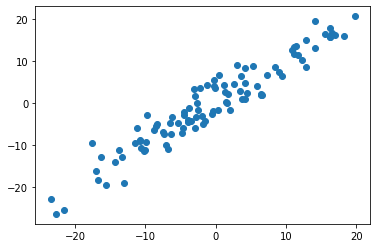

In [58]:
plt.scatter(X, y)

In [59]:
model = nn.Linear(1, 1)

In [60]:
model(x)

tensor([-1.0610], grad_fn=<AddBackward0>)

In [61]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.4820]], requires_grad=True),
 Parameter containing:
 tensor([0.3848], requires_grad=True)]

In [62]:
class LinearRegression(nn.Module):
    def __init__(self, input_size, output_size):
        super().__init__()
        self.linear = nn.Linear(input_size, output_size) # model.add(Dense())
        
    def feed_forward(self, x):
        return self.linear(x)

In [63]:
model = LinearRegression(1, 1)

In [64]:
criterion = nn.MSELoss()

In [65]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [33]:
# #single train loop
# #pass data in
# y_pred = model.feed_forward(X)
# #compute the loss
# loss = criterion(y_pred, y)
# #backpropogate loss
# loss.backward()
# #move to minimize
# optimizer.step()

In [66]:
epochs = 100
losses = []
for i in range(epochs):
    y_pred = model.feed_forward(X)
    loss = criterion(y_pred, y)
    losses.append(loss)
    if i%10 == 0:
        print(f'Epoch {i}. Loss: {loss.item()}')
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch 0. Loss: 23.50802993774414
Epoch 10. Loss: 18.917577743530273
Epoch 20. Loss: 15.763472557067871
Epoch 30. Loss: 13.59621810913086
Epoch 40. Loss: 12.107078552246094
Epoch 50. Loss: 11.083871841430664
Epoch 60. Loss: 10.380810737609863
Epoch 70. Loss: 9.897729873657227
Epoch 80. Loss: 9.565801620483398
Epoch 90. Loss: 9.337730407714844


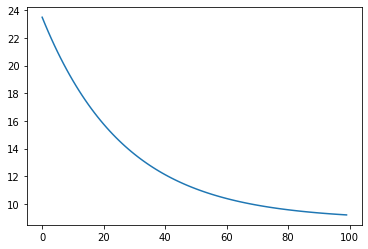

In [67]:
plt.plot(losses)

In [68]:
list(model.parameters())

[Parameter containing:
 tensor([[0.9198]], requires_grad=True),
 Parameter containing:
 tensor([0.4825], requires_grad=True)]

In [38]:
w, b = model.parameters()

In [42]:
#X

In [44]:
import numpy as np

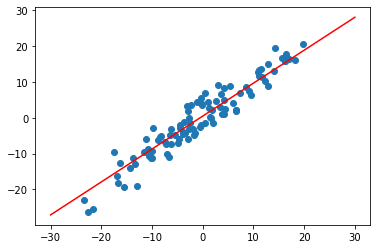

In [73]:
plt.scatter(X, y)
x2 = np.linspace(-30, 30, 100)
plt.plot(x2, .9198*x2 + .4825, '-r')

### Classification

In [143]:
from sklearn.datasets import load_breast_cancer

In [144]:
cancer = load_breast_cancer()

In [145]:
X, y = cancer.data, cancer.target

In [146]:
from sklearn.preprocessing import StandardScaler

In [147]:
sscaler = StandardScaler()

In [148]:
X = sscaler.fit_transform(X)

In [149]:
class LinearClassifier(nn.Module):
    def __init__(self):
        super().__init__()
        
        self.layer_1 = nn.Linear(30, 32)
        self.layer_2 = nn.Linear(32, 32)
        self.layer_out = nn.Linear(32, 1)
        
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, X):
        x = self.relu(self.layer_1(X))
        x = self.relu(self.layer_2(x))
        x = self.layer_out(x)
        x = self.sigmoid(x)
        return x
        
    
        
        

In [150]:
model = LinearClassifier()

In [151]:
X = torch.from_numpy(X).float()
y = torch.from_numpy(y).float()

In [152]:
y = y.reshape(-1, 1)

In [153]:
loss_fn = nn.BCELoss()

In [154]:
optimizer = torch.optim.SGD(model.parameters(), lr = 0.01)

In [155]:
#model(X)

In [158]:
epochs = 1000
losses = []
for epoch in range(epochs):
    y_pred = model(X)
    loss = loss_fn(y_pred, y)
    losses.append(loss)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    if epoch%100 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item()}')

Epoch 0, Loss: 0.09101571142673492
Epoch 100, Loss: 0.08427125215530396
Epoch 200, Loss: 0.07890617847442627
Epoch 300, Loss: 0.07459335029125214
Epoch 400, Loss: 0.07101088017225266
Epoch 500, Loss: 0.06792917847633362
Epoch 600, Loss: 0.06521158665418625
Epoch 700, Loss: 0.0627998635172844
Epoch 800, Loss: 0.060724254697561264
Epoch 900, Loss: 0.058880966156721115


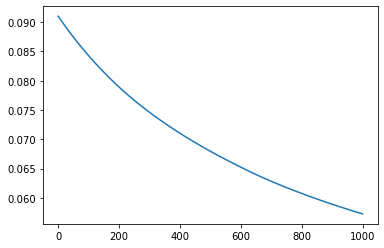

In [159]:
plt.plot(losses)

In [163]:
preds = np.where(model(X) > 0.5, 1, 0)

In [164]:
from sklearn.metrics import confusion_matrix

In [165]:
confusion_matrix(y, preds)

array([[206,   6],
       [  2, 355]])